In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('./data/south-korean-pollution-data.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

########## Simple Data Exploration 1 ##########
# Set pandas options to display all rows and columns
print("=========Dtype of all columns=========")
print(df.dtypes)

print("=========Involving Nan=========")
print(df.isna().sum())

print("========= Statistical Description =========") 
print(df.describe())


=========Dtype of all columns=========
Unnamed: 0      int64
date           object
pm25            int64
pm10            int64
o3              int64
no2             int64
so2             int64
co              int64
Lat           float64
Long          float64
City           object
District       object
Country        object
dtype: object
=========Involving Nan=========
Unnamed: 0    0
date          0
pm25          0
pm10          0
o3            0
no2           0
so2           0
co            0
Lat           0
Long          0
City          0
District      0
Country       0
dtype: int64
========= Statistical Description =========
         Unnamed: 0          pm25          pm10            o3           no2   
count  34530.000000  34530.000000  34530.000000  34530.000000  34530.000000  \
mean   17264.500000     53.224616     34.757428     34.506371     14.802114   
std     9968.096734     39.952008     21.046112     17.393329     11.479781   
min        0.000000      0.000000      0.000000 

In [77]:
########## Simple Data Exploration 2: 각 도시별 오염지수 평균 출력 ##########
# Everything here is before scaling
print("\n========= Mean values of pollutants for each city =========")
# Set pandas options to display all rows and columns

pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Before Scaling, compute the mean of poollutants for each city
city_pollutants_mean = df.groupby('City')[pollutants].mean()
print(city_pollutants_mean)

# 각 오염 물질에 대해 도시를 내림차순으로 정렬
city_ranking = {}
for pollutant in pollutants:
    city_ranking[pollutant] = city_pollutants_mean[pollutant].sort_values(ascending=False).index

city_ranking_df = pd.DataFrame(city_ranking)

print("\n========= Ranking of cities for each pollutant =========")
print(city_ranking_df)


========= Mean values of pollutants for each city =========
                      pm25       pm10         o3        no2       so2   
City                                                                    
Bangsan-Myeon    20.508208  26.663989  35.886483   3.799162  1.328327  \
Cheongnim-Dong   65.902985  36.868159  30.501244  16.982587  8.810945   
Geumchon-Dong    53.533241  40.785665  34.775277  19.585873  4.576177   
Gwanak-Gu        67.736806  37.376389  30.276042  29.051736  5.899306   
Hwasun-Eup       50.592904  25.227824  30.393091   8.750700  2.706816   
Hyeoksin-Dong    66.608197  33.039344  33.344262  12.962295  2.237705   
Jeongnim-Dong    43.443056  31.795139  33.016319  16.240972  2.740625   
Jungang-Way      60.187500  35.308239  34.301847  13.881747  3.773082   
Juwol-Dong       60.256545  33.860384  31.405934  21.294590  3.621291   
Nowon-Gu         64.545486  34.427880  31.416119  24.130405  6.147008   
Onui-Dong        59.957377  32.880328  25.495082  16.531148  1.

In [78]:
########## Simple Data Exploration 2: 각 '도(행정구역)'별 오염지수 평균 출력 ##########
print("\n========= Mean values of pollutants for each district =========")

# Before Scaling, compute the mean of poollutants for each 행정구역
district_pollutants_mean = df.groupby('District')[pollutants].mean()
print(district_pollutants_mean)

# 각 오염 물질에 대해 행정구역 내림차순으로 정렬
district_ranking = {}
for pollutant in pollutants:
    district_ranking[pollutant] = district_pollutants_mean[pollutant].sort_values(ascending=False).index

district_ranking_df = pd.DataFrame(district_ranking)

print("\n========= Ranking of cities for each pollutant =========")
print(district_ranking_df)


========= Mean values of pollutants for each district =========
                   pm25       pm10         o3        no2       so2        co
District                                                                    
Chuncheon-Si  60.187500  35.308239  34.301847  13.881747  3.773082  4.925071
Chungbuk      64.581967  30.118033  33.731148   8.937705  1.881967  3.986885
Chungnam      46.831791  36.584816  39.890154   8.920047  3.014947  3.626335
Gangwon       27.437086  27.755831  34.061330   6.035416  1.436222  3.706306
Gyeongbuk     66.203516  32.785495  37.469451  12.224176  5.436484  4.603956
Gyeonggi      50.703432  38.875620  36.842293   8.937711  2.047213  3.521127
Jeonbuk       66.953600  33.041600  33.395200  12.801600  2.219200  3.358400
Jeonnam       50.592904  25.227824  30.393091   8.750700  2.706816  4.999066
Nam-Gu        60.256545  33.860384  31.405934  21.294590  3.621291  5.315532
Paju-Si       53.533241  40.785665  34.775277  19.585873  4.576177  6.048476
Seo-Gu     

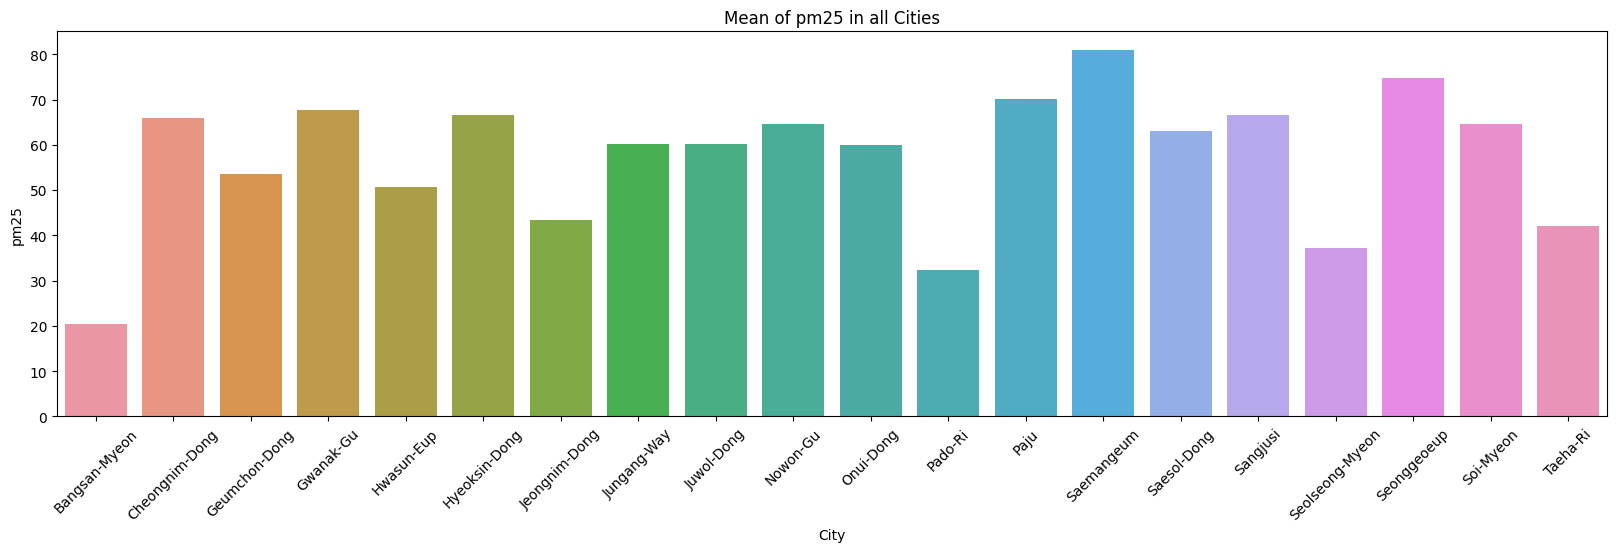

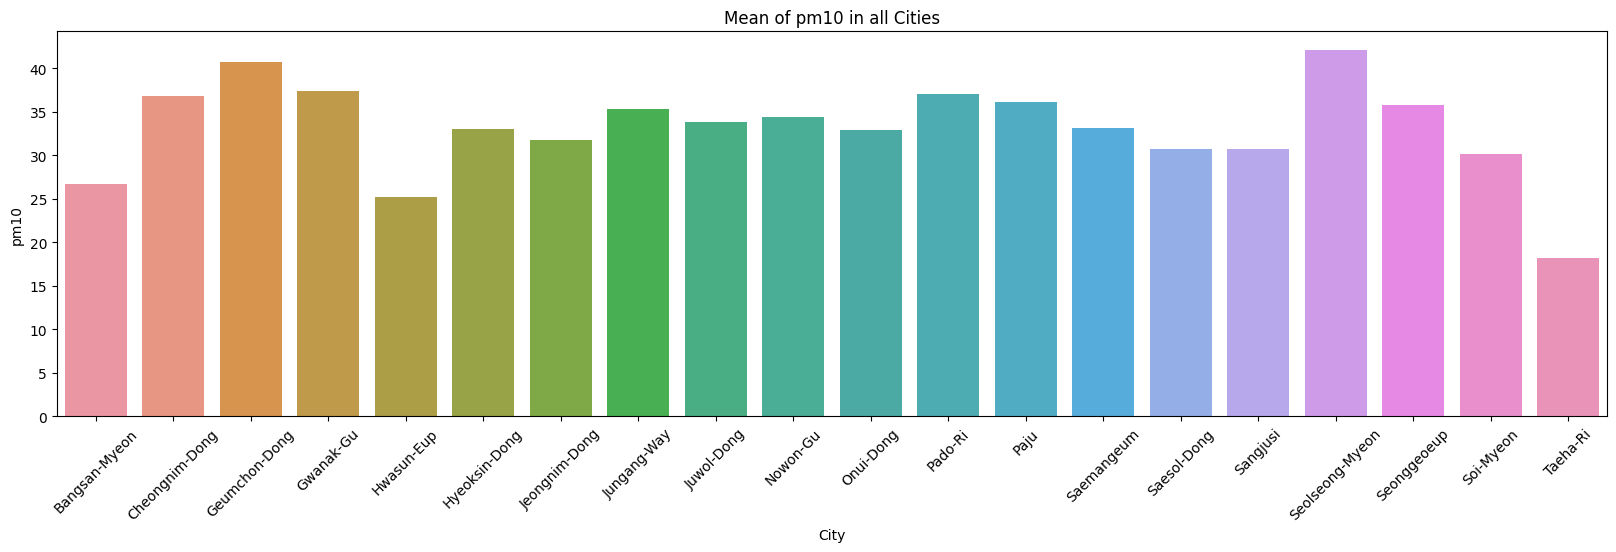

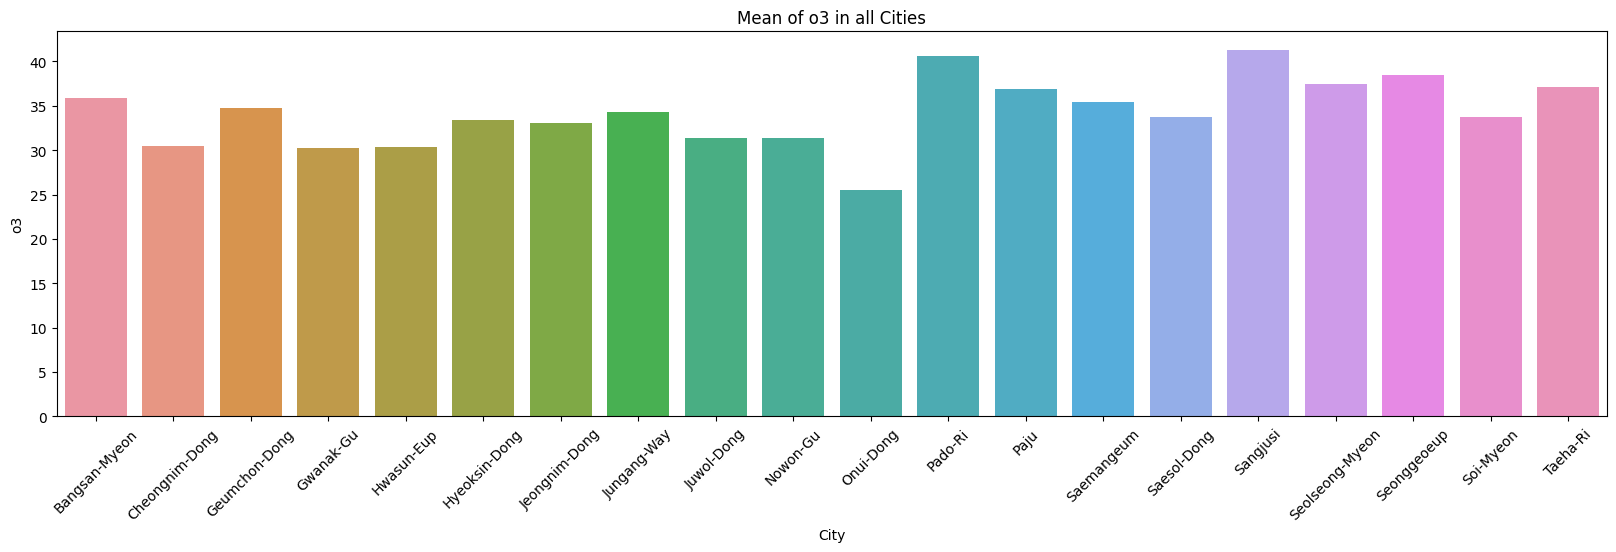

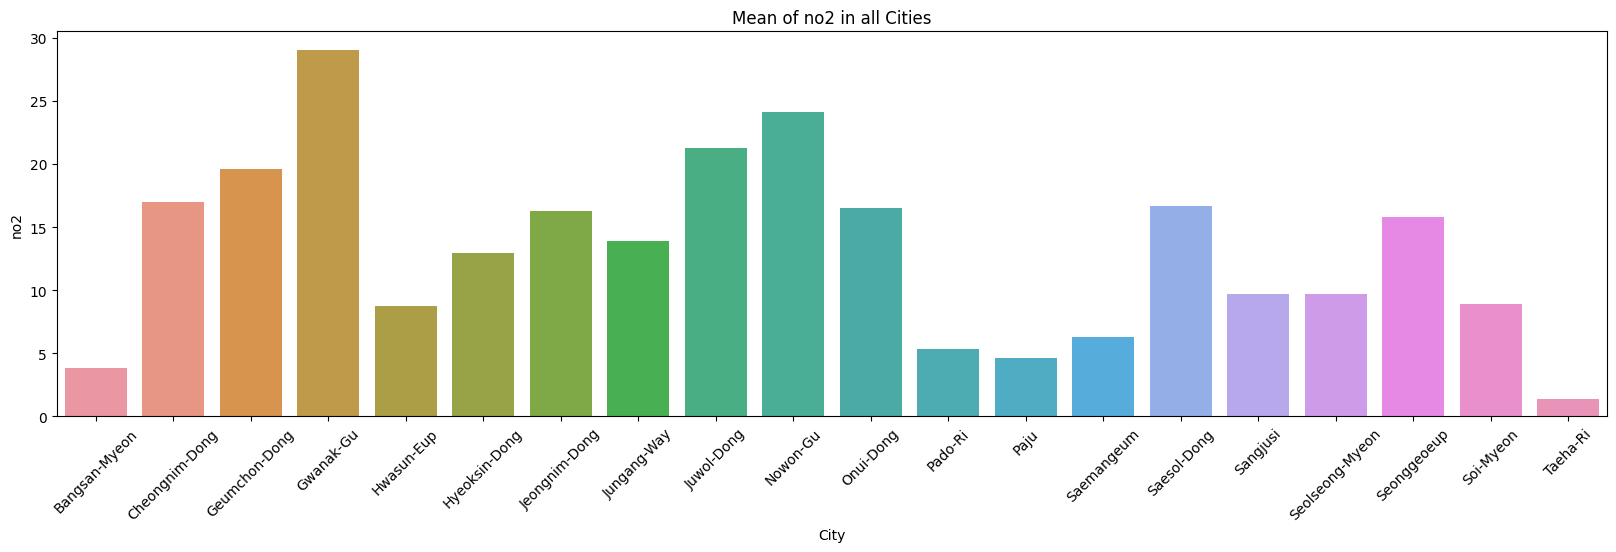

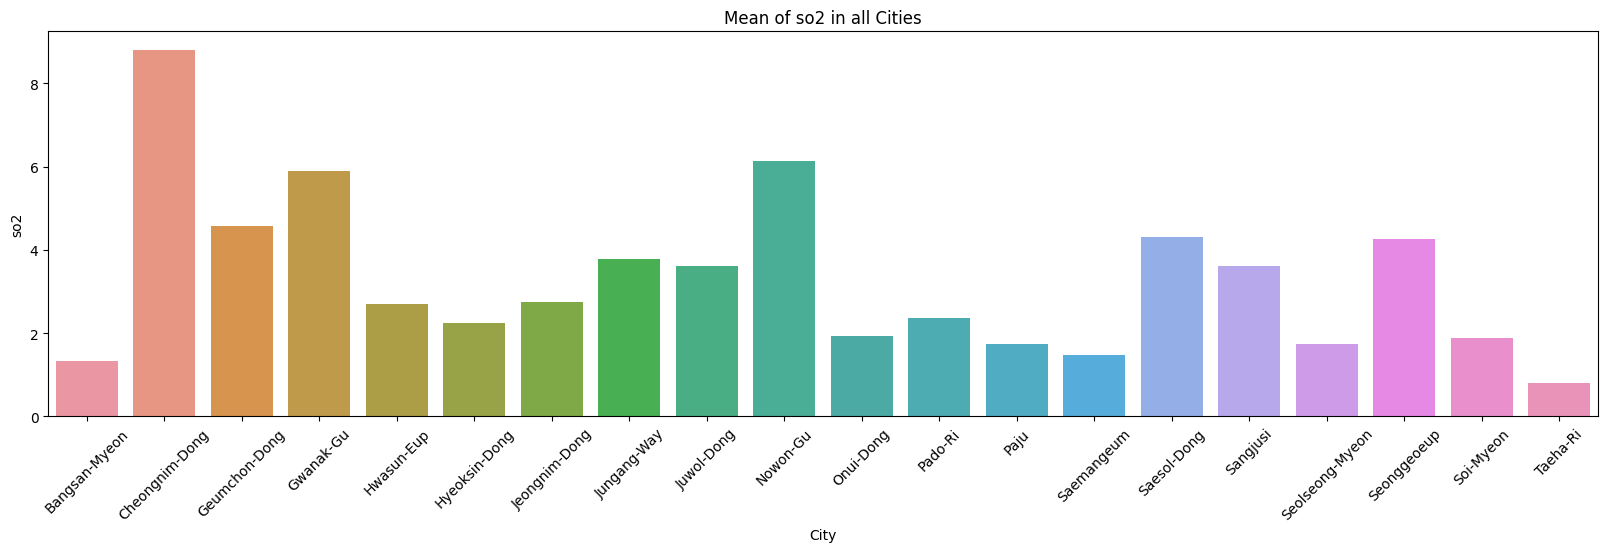

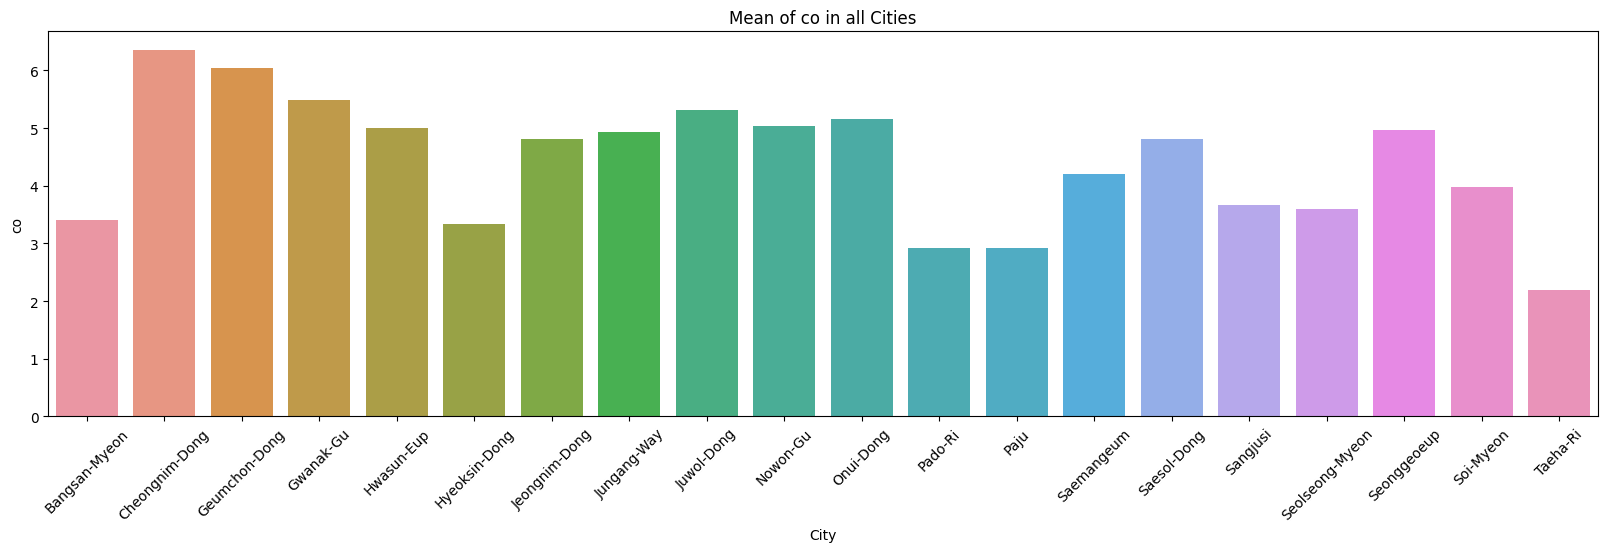

In [79]:
########## Simple Data Exploration 3: Plots-1 ##########
# 각 도시의 오염 물질별 평균 구하기
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.barplot(x=city_pollutants_mean.index, y=pollutant, data=city_pollutants_mean)
    plt.title(f'Mean of {pollutant} in all Cities')
    plt.xticks(rotation=45)
    plt.show()



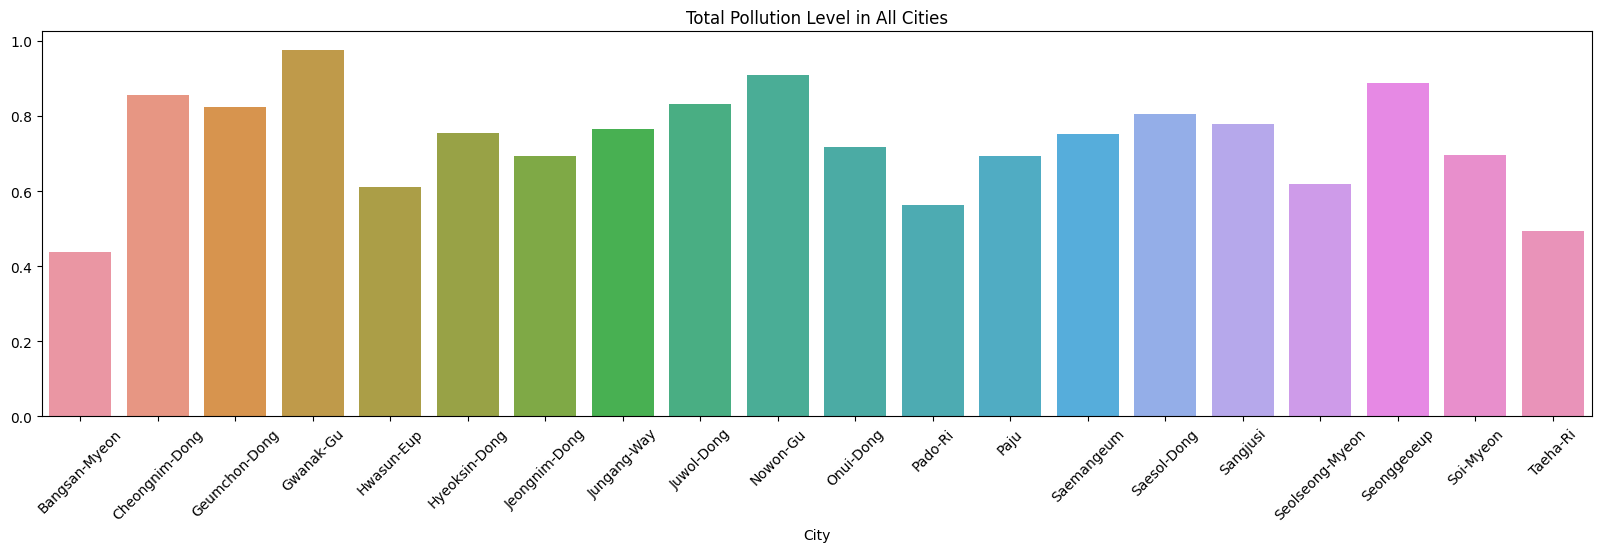

In [80]:
########## Simple Data Exploration 3: Plot-2 ##########
# Scaling with minmax
scaler = MinMaxScaler()
df[pollutants] = scaler.fit_transform(df[pollutants])

# 각 도시의 오염 물질의 스케일링된 값 합산 후 평균 구하기
city_total_means = df.groupby('City')[pollutants].mean().sum(axis=1)
# plot 2
plt.figure(figsize=(20, 5))
sns.barplot(x=city_total_means.index, y=city_total_means.values)
plt.title('Total Pollution Level in All Cities')
plt.xticks(rotation=45)
plt.show()

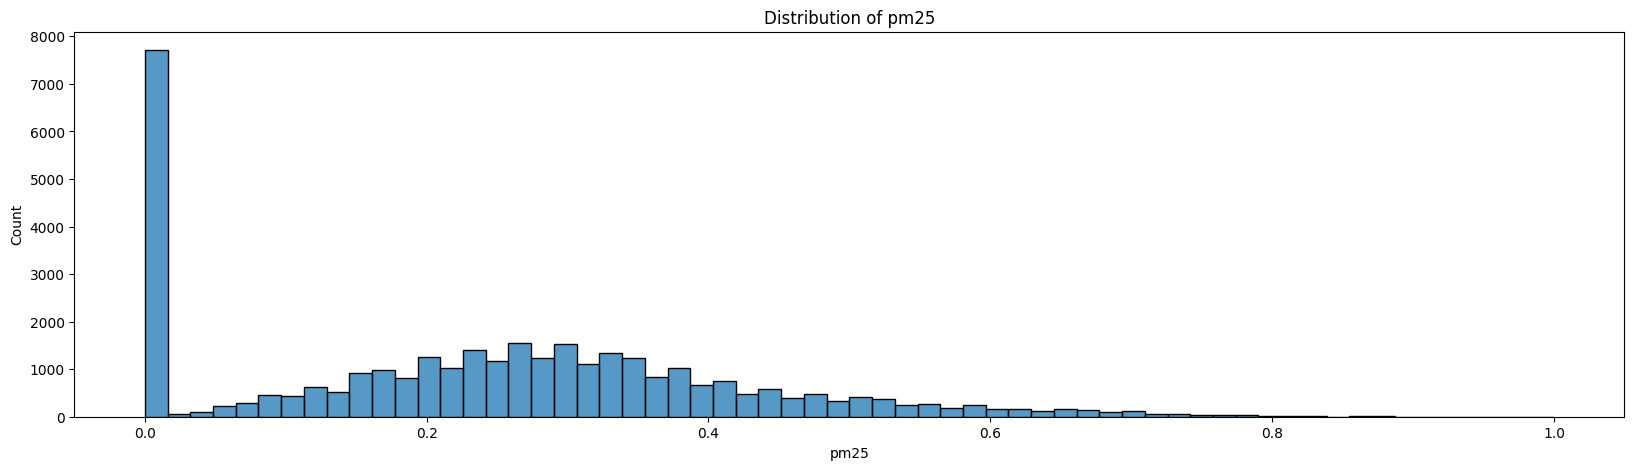

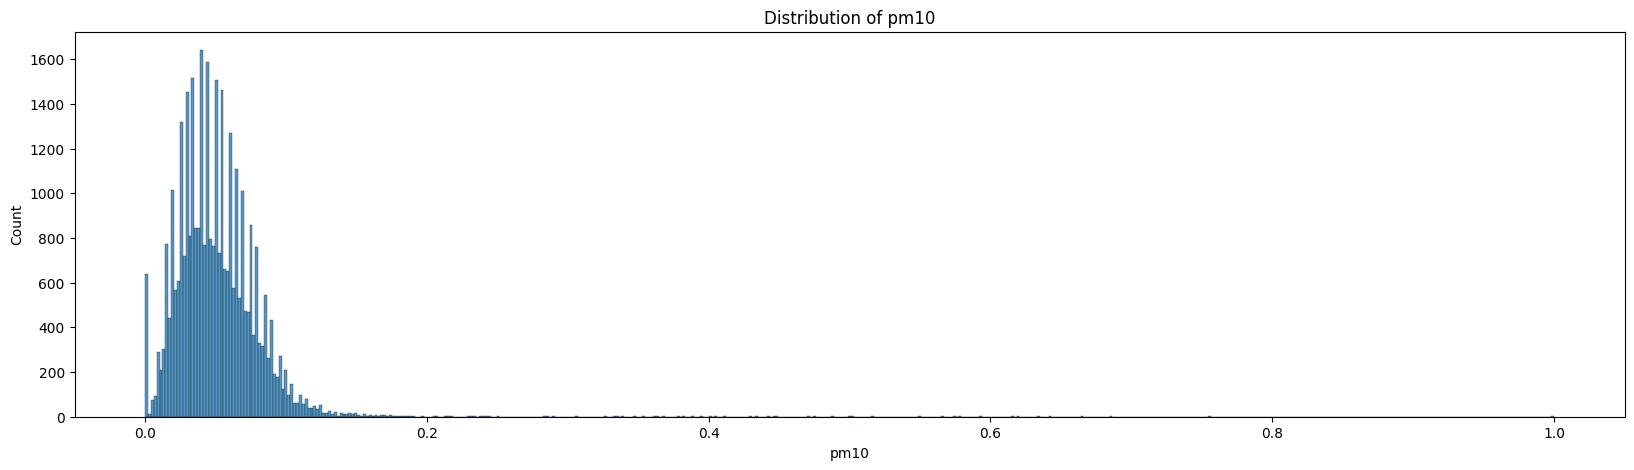

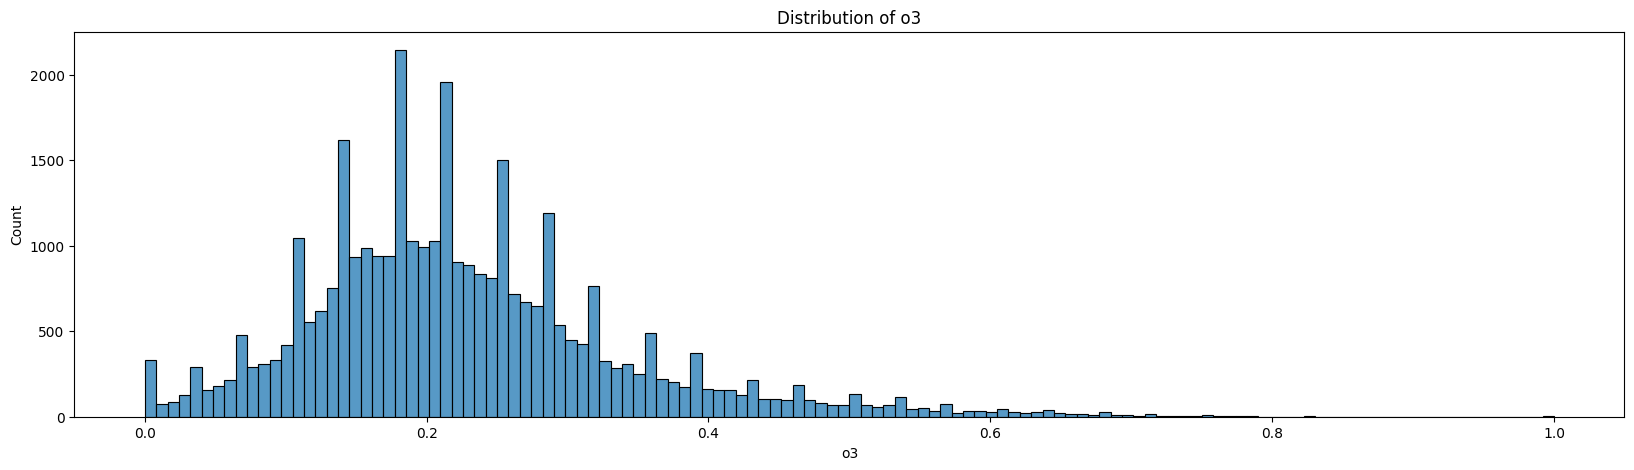

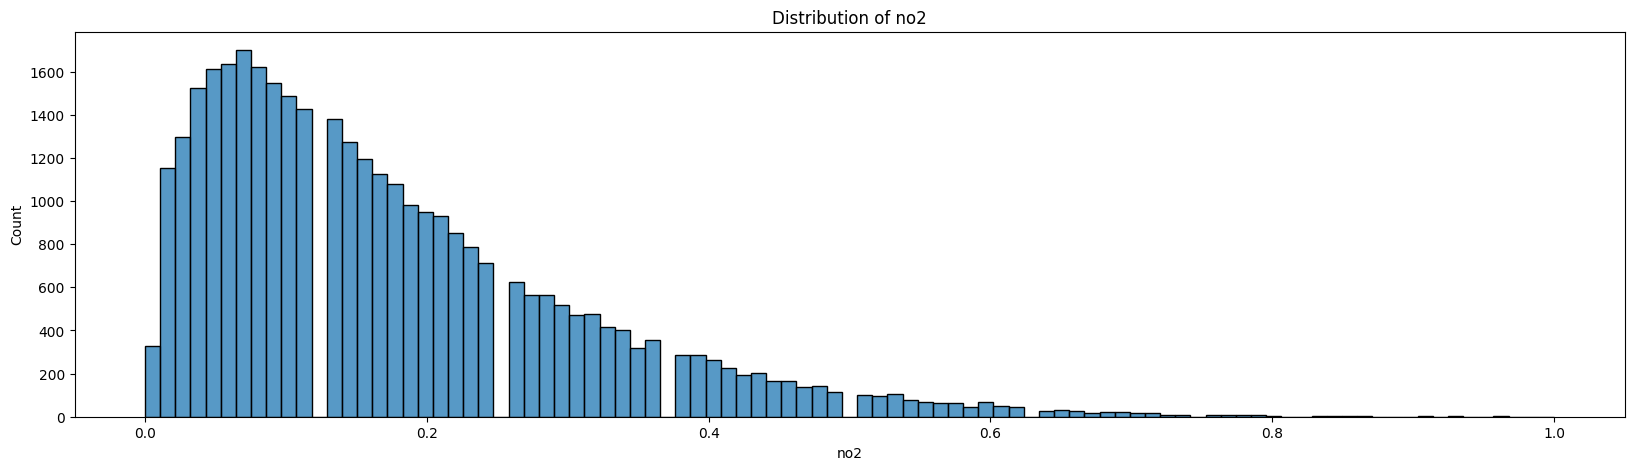

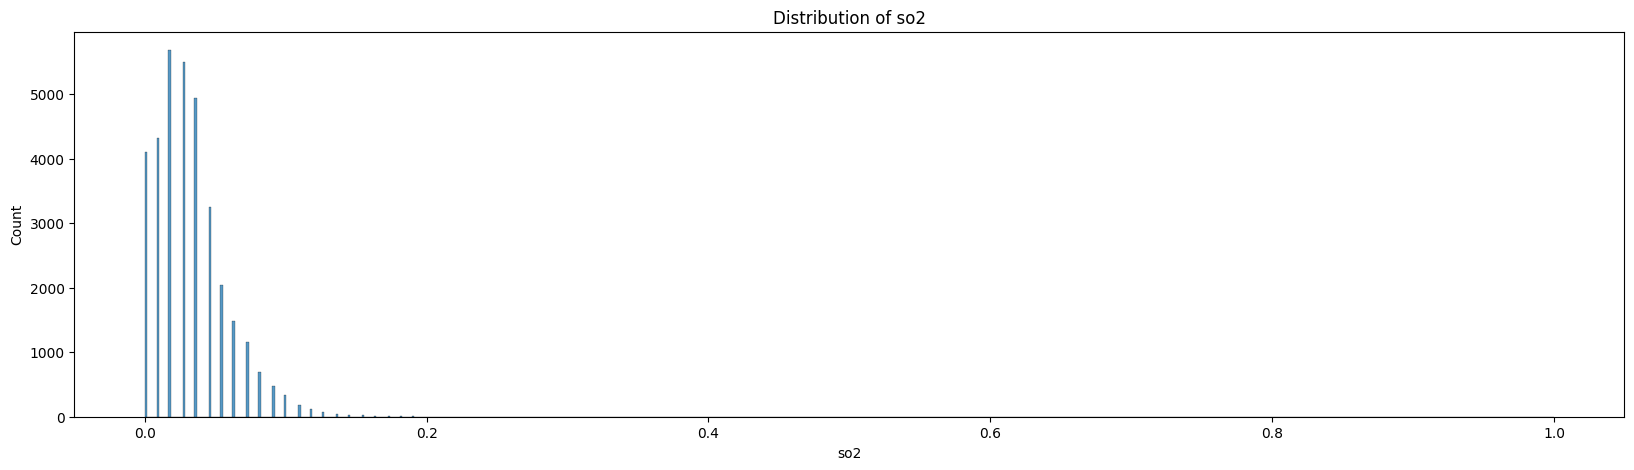

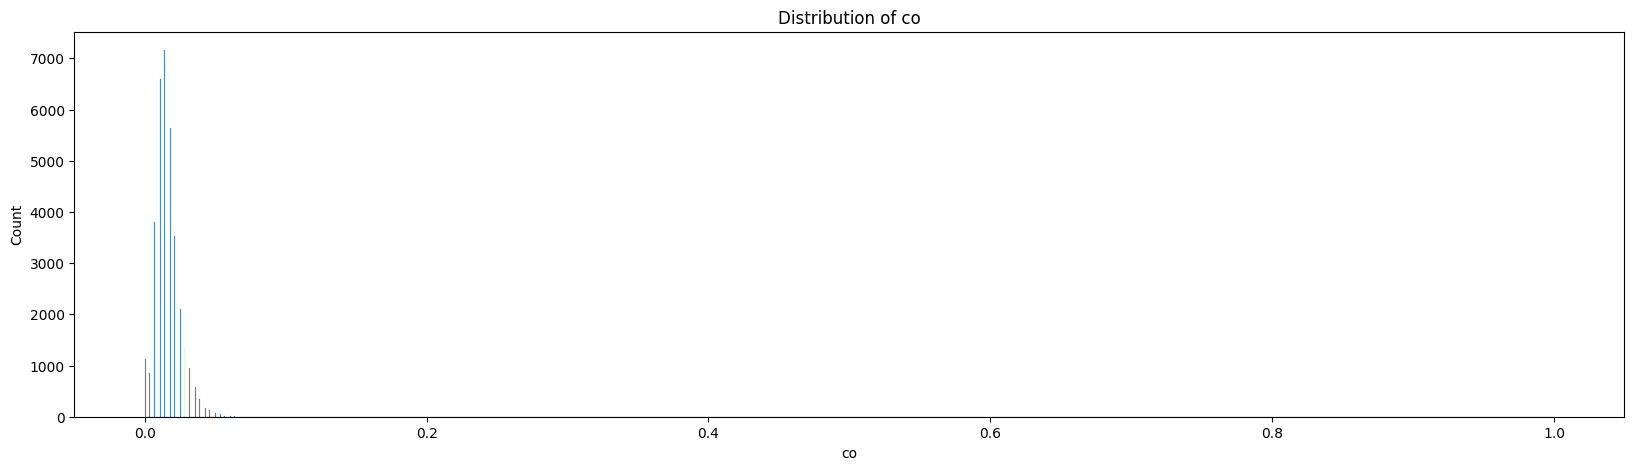

In [81]:
########## Simple Data Exploration 3: Plot-3 ##########
# showing the distribution of pollutants
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.histplot(df[pollutant])
    plt.title(f'Distribution of {pollutant}')
    plt.show()

# Drop the rows with pm25 = 0.0
df = df[df['pm25'] != 0.0]

# showing the distribution of pollutants
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.histplot(df[pollutant])
    plt.title(f'Distribution of {pollutant}')
    plt.show()



========= PCA Dataframe =========
            PC1       PC2            City
0      0.033662  0.197929   Bangsan-Myeon
1     -0.033363  0.143504   Bangsan-Myeon
2     -0.145128  0.062796   Bangsan-Myeon
3     -0.171283  0.030742   Bangsan-Myeon
4     -0.137597  0.015467   Bangsan-Myeon
5     -0.156065  0.019064   Bangsan-Myeon
6     -0.124858  0.050010   Bangsan-Myeon
7     -0.142578  0.047635   Bangsan-Myeon
8     -0.151159  0.050830   Bangsan-Myeon
9     -0.141771  0.086201   Bangsan-Myeon
10     0.023679  0.197542   Bangsan-Myeon
11     0.095235  0.246835   Bangsan-Myeon
12    -0.042263  0.126483   Bangsan-Myeon
13    -0.097138  0.097782   Bangsan-Myeon
14    -0.050467  0.129592   Bangsan-Myeon
15    -0.110125  0.041465   Bangsan-Myeon
16    -0.108801  0.063565   Bangsan-Myeon
17    -0.138121  0.044324   Bangsan-Myeon
18    -0.115203  0.088283   Bangsan-Myeon
19    -0.089003 -0.057025   Bangsan-Myeon
20    -0.126850  0.012110   Bangsan-Myeon
21    -0.086406  0.040743   Bangsan-Myeon

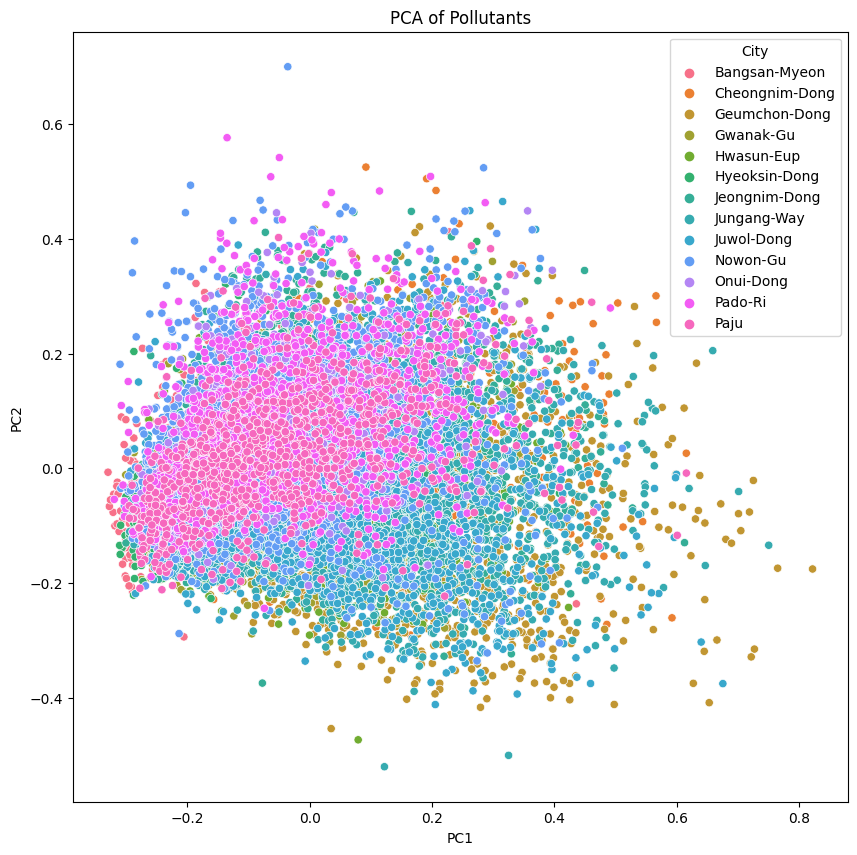

In [83]:
########## Data Feature Engineering 1: Perform PCA with 2 components ##########
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[pollutants])
pca_df = pd.DataFrame(pca.transform(df[pollutants]), columns=['PC1', 'PC2'])
pca_df['City'] = df['City']


# Print the pca_df 
print("\n========= PCA Dataframe =========")
print(pca_df)

# Plot the pca_df
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='City', data=pca_df)
plt.title('PCA of Pollutants')
plt.show()



========= PCA Dataframe =========
                     PC1       PC2
City                              
Bangsan-Myeon  -0.158812  0.023761
Cheongnim-Dong  0.071494  0.007935
Geumchon-Dong   0.100473 -0.061018
Gwanak-Gu      -0.070378 -0.020668
Hwasun-Eup     -0.013288 -0.016382
Hyeoksin-Dong  -0.075221 -0.011405
Jeongnim-Dong   0.012779  0.018914
Jungang-Way     0.063300 -0.036303
Juwol-Dong      0.014237 -0.020422
Nowon-Gu       -0.066875  0.055137
Onui-Dong      -0.046182  0.060338
Pado-Ri        -0.035953  0.080300
Paju           -0.041512  0.028907


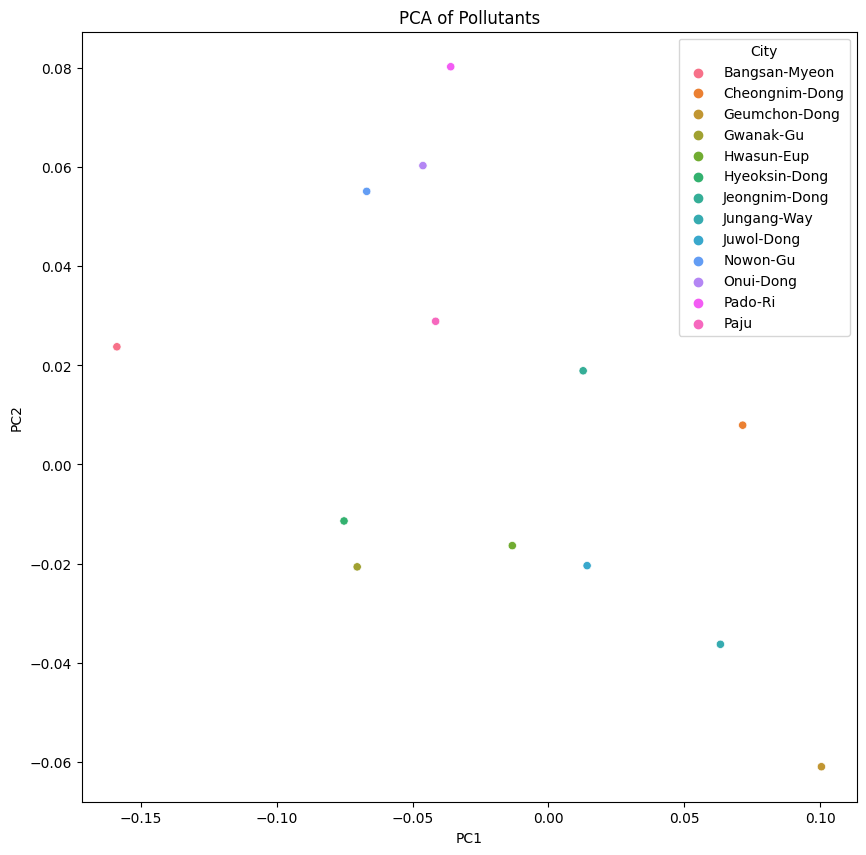

In [84]:
# combine the pca_df values by City
pca_df = pca_df.groupby('City').mean()
print("\n========= PCA Dataframe =========")
print(pca_df)

# Plot the pca_df
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='City', data=pca_df)
plt.title('PCA of Pollutants')
plt.show()


C:\Users\sisi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


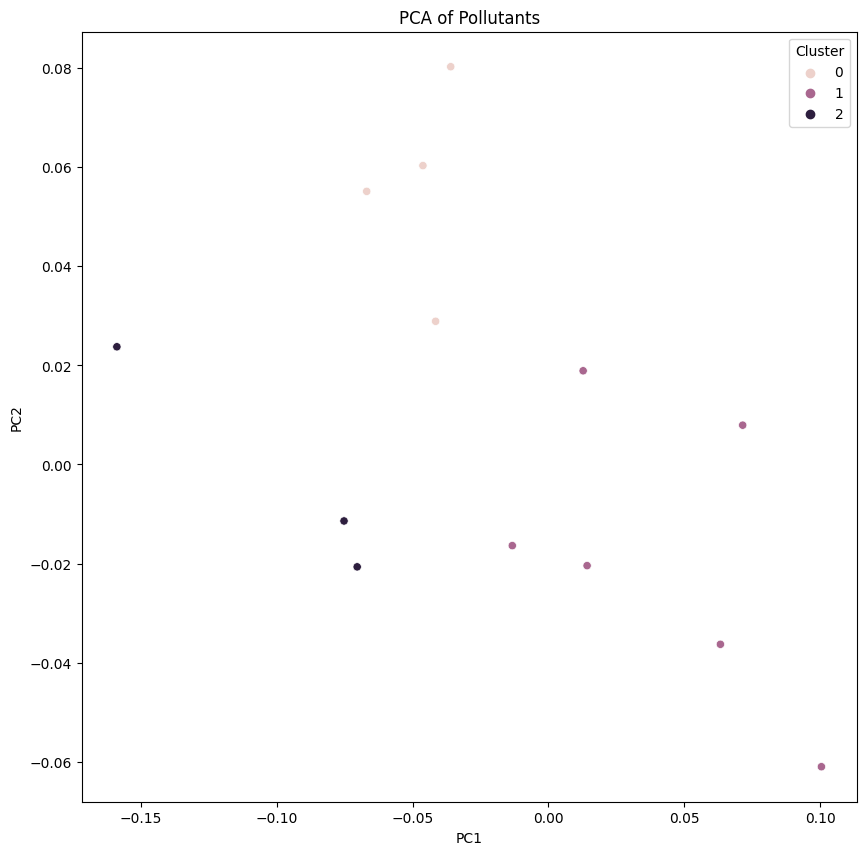


========= City and Cluster =========
                     PC1       PC2  Cluster
City                                       
Bangsan-Myeon  -0.158812  0.023761        2
Cheongnim-Dong  0.071494  0.007935        1
Geumchon-Dong   0.100473 -0.061018        1
Gwanak-Gu      -0.070378 -0.020668        2
Hwasun-Eup     -0.013288 -0.016382        1
Hyeoksin-Dong  -0.075221 -0.011405        2
Jeongnim-Dong   0.012779  0.018914        1
Jungang-Way     0.063300 -0.036303        1
Juwol-Dong      0.014237 -0.020422        1
Nowon-Gu       -0.066875  0.055137        0
Onui-Dong      -0.046182  0.060338        0
Pado-Ri        -0.035953  0.080300        0
Paju           -0.041512  0.028907        0


In [85]:
# clustering with KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)
pca_df['Cluster'] = kmeans.labels_

# Plot the pca_df
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df)
plt.title('PCA of Pollutants')
plt.show()

# print City and Cluster
print("\n========= City and Cluster =========")
print(pca_df)
